# 2D Coloc Heatmap Skript

## General Info
This script takes two images as input and creates a heatmap which is supposed to highlight the areas in the image where the two channels colocalize.
The idea behind the script is to normalize both channels to relative intensities and then compare the pixel values for both channels. For this, the pixel values are interpreted as a vector (int_channel_A, int_int_channel_B). In a classical 2D coordinate system this vector starts at (0,0) and has two properties: Length and Angle. The higher the intensities in the channels,the greater the length of the vector and the closer the angle is to 45° the more similar is the relative brightness in both channels. This tool calculates the heatmap intensity of each pixel by calculating the length of the vector and multiply it by y=1-(|cos(x)-sin(x)|), whereby y = 0 at angles of 0° and 90° and y = 1 at the 45° angle.
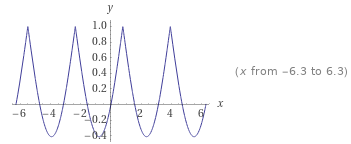
By this multiplication the pixels increase in brightness the more similar their relative intensities in the two channels and are darker the more dissimilar their relative intensities are. 
This tool is especially designed to show spatial relation between colocalizing pixels. It is of limited use to determine the biological relevance of the colocalization because it highlights areas just based on the similarities of their relative intensities.

## How to use this skript
0) You may need to install at least the tifffile library if you already use anaconda3

1) Copy two one channel tiffs in the input folder in the directory of this notebook.

2) Run all the boxes from the skript.

3) Save resulting figure.



In [13]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import sys
from matplotlib import pyplot as plt
import tifffile as tff
import os
import zipfile

In [21]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(workbookDir)
inputpath = workbookDir+'/Input/' #This is the default input path. Make sure you have only two single channel tiffs in this folder
plt.rcParams['figure.figsize'] = [60/2.54, 40/2.54] #Change this if you want to change the output figure size

(2000, 2000, 2)


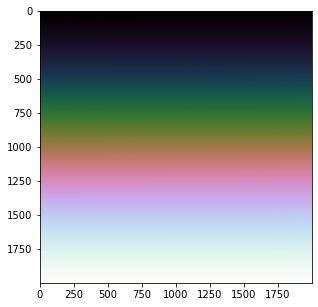

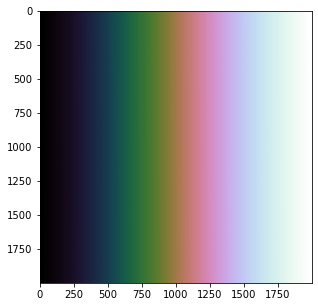

In [22]:
#Here the two tiffs are loaded and copied into a single array. The data is normalized on the maximum value
#In the end the array shape and pictures are shown for verification.
i=0
for file in os.listdir(inputpath):
    img = tff.imread(inputpath+file)
    img = np.stack((img,)*1, axis=-1)
    X = np.array(img).astype(np.int)    
    maxi = np.max(X)
    X = np.true_divide(X,maxi)

    if i==0 :
        array = X
    else :
            array = np.concatenate((array, X), axis=2)
    i=i+1
plt.figure(figsize=(5, 5))
plt.imshow(array[:,:,0], cmap="cubehelix")
plt.figure(figsize=(5, 5))
plt.imshow(array[:,:,1], cmap="cubehelix")
print(array.shape)

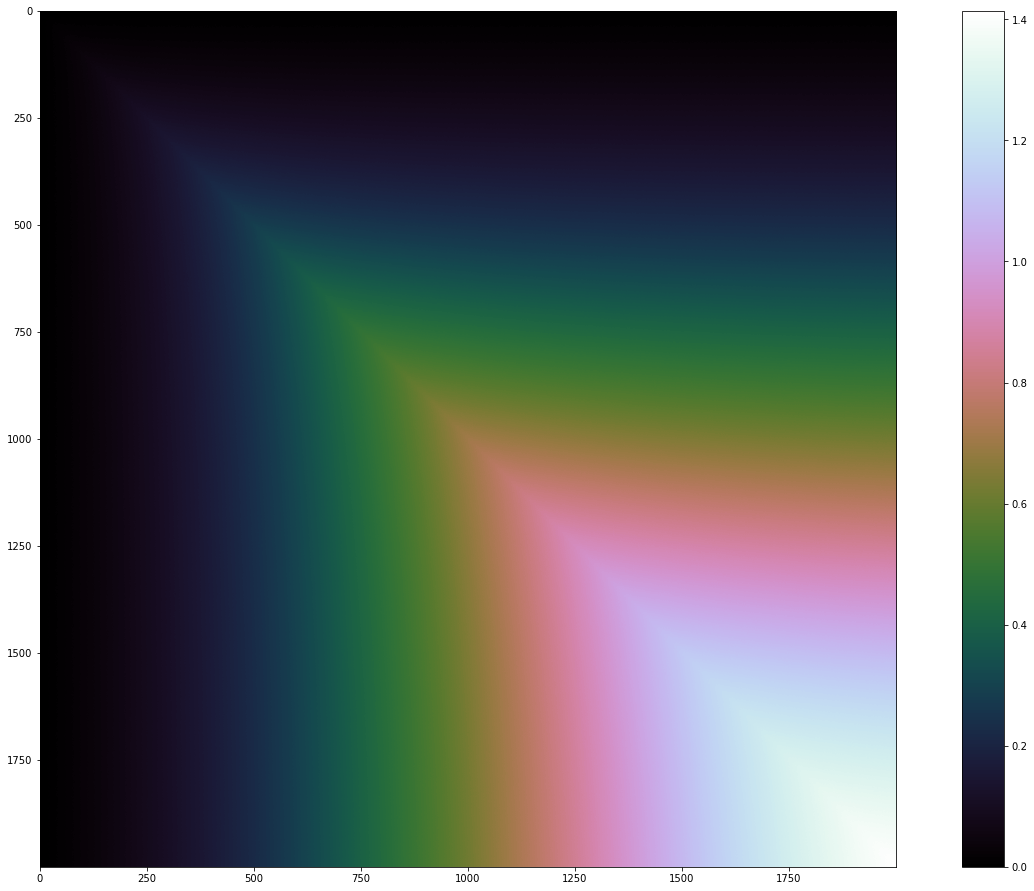

In [23]:
# Here the calculations are done. Via pythagoras the ctmap is generated with the vector lengths. Cosmaps and Sinmaps are
# created by calculating the angle of the vector to the x-axis.
# Finally the colmap is generated by the formula described above in the general info section. 
sqarray = array**2
ctmap = sqarray[:,:,0]+sqarray[:,:,1]
ctmap = ctmap**0.5
cosmap = np.divide(array[:,:,0], ctmap, out=np.zeros_like(array[:,:,0]), where=ctmap!=0)
sinmap = np.divide(array[:,:,1], ctmap, out=np.zeros_like(array[:,:,1]), where=ctmap!=0)
colmap = ctmap*(1-abs(cosmap-sinmap))
plt.imshow(colmap, cmap="cubehelix")
#plt.imshow(ctmap, cmap="cubehelix") #This command will show the ct-map with the just the vector lengths
plt.colorbar()

(2000,)
(2000,)
(2000, 2000)


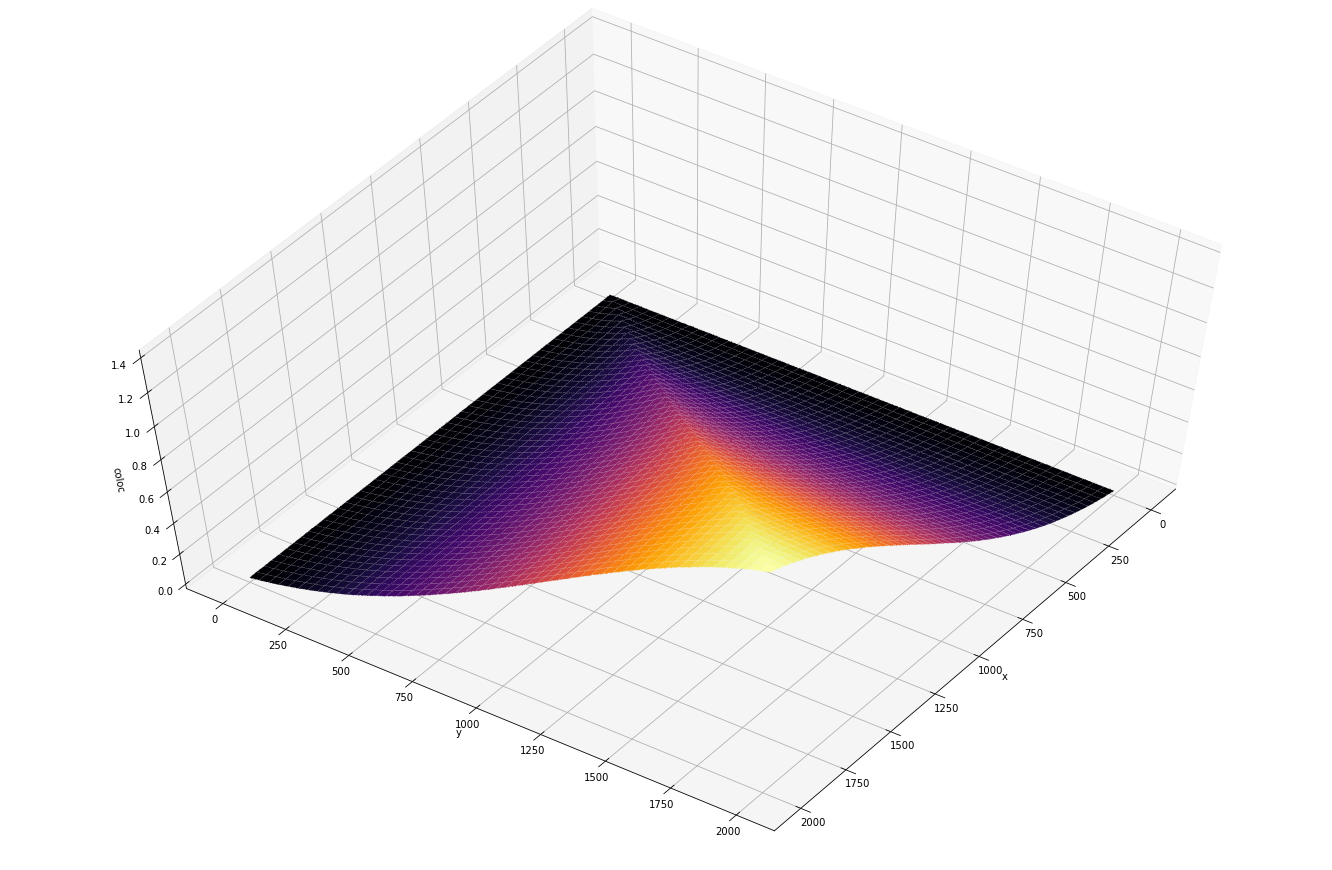

In [24]:
#This plot will give you a 3D visualization of the colmap data.
fig = plt.figure()
ax = plt.axes(projection='3d')
xl=np.linspace(0,len(colmap[1,:])-1,len(colmap[1,:]))
yl=np.linspace(0,len(colmap[:,1])-1,len(colmap[:,1]))
print(np.shape(xl))
print(np.shape(yl))
print(np.shape(colmap))
X,Y = np.meshgrid(xl,yl)
ax.plot_surface(X,Y,colmap,cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('coloc');
ax.view_init(60, 35)

